# **Importing the libraries**

In [1]:
import numpy as np 
  
import pandas as pd 
  
import matplotlib.pyplot as plt 

# **Importing the datasets**

In [2]:
train_df = pd.read_csv("/home/somya/Downloads/mnist_train_small.csv")
test_df = pd.read_csv("/home/somya/Downloads/mnist_test.csv")

In [3]:
train_df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,0,0,0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Arranging the training dataset**

In [5]:
x1 = train_df.drop(['6'], axis = 1).values

x0_train = np.ones((np.shape(x1)[0],1))

x_train = np.hstack((x0_train,x1))

In [6]:
print(x_train)
print(x_train.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(19999, 785)


In [7]:
y1 = train_df['6']
y_train = y1.to_numpy()
y_train = np.vstack(y_train)

In [8]:
print(y_train)
print(y_train.shape)

[[5]
 [7]
 [9]
 ...
 [2]
 [9]
 [5]]
(19999, 1)


# **Arranging the test dataset**

In [9]:
x2 = test_df.drop(index = 1942 , columns ='7').values

x0_test = np.ones((np.shape(x2)[0],1))

x_test = np.hstack((x0_test,x2))

In [10]:
print(x_test)
print(x_test.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(1942, 785)


In [11]:
y2 = test_df['7']
y_test = y2.drop(index = 1942).values
y_test = np.vstack(y_test)

In [12]:
print(y_test)
print(y_test.shape)

[[2]
 [1]
 [0]
 ...
 [5]
 [7]
 [8]]
(1942, 1)


# **Visualising the data**

In [13]:
digit = x1[0]
digit_image = digit.reshape(28,28)

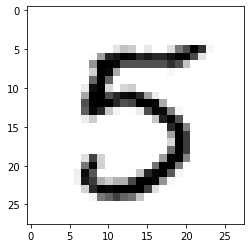

In [14]:
plt.imshow(digit_image, cmap = plt.cm.binary)

# **Implementation of model**

In [15]:
#Parameter initialisation

theta = np.zeros((x_train.shape[1], 1))

#Hypothesis declaration

y_pred = np.dot(x_train , theta)

#difference in values

diff = np.subtract(y_pred , y_train)

In [16]:
#Cost function
def cost_function(y, diff ) :
  
    sum = diff.T.dot(diff)

    return (sum / ( 2 * y.shape[0] ))

In [17]:
#Updating the parameter theta

def update_theta( learning_rate, iterations, x, y, theta) :          
       
      for i in range( iterations ) : 

        y_pred = np.dot(x , theta)

        diff = np.subtract(y_pred , y)

        error =  np.dot(x.T, diff)
     
        theta = theta - (learning_rate * error ) / y.shape[0]
          
      return theta

In [18]:
#Normalizing the features

x_train = x_train/255
x_test = x_test/255

In [19]:
#Applying gradient descent

iterations = 2000

learning_rate = 0.0355

theta = update_theta( learning_rate, iterations, x_train, y_train, theta)

#y_pred = np.dot(x_train , theta)
y_pred = np.dot(x_test , theta)

#diff = np.subtract(y_pred , y_train)
diff = np.subtract(y_pred , y_test)

In [20]:
#print(cost_function(y_train, diff))
print(cost_function(y_test, diff))

[[1.99990254]]


In [21]:
print ("The updated value of theta is ", theta)

The updated value of theta is  [[ 4.99125751e-02]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-1.45747842e-04]
 [-3.14815338e-03]
 [-3.14815338e-03]
 [-1.31173057e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.12207527e-02]
 [ 2.01598710e-02]
 [ 2.76714972e-02]
 [ 2.88801935e-02]
 [ 3.32148883e-02]
 [ 2.31243426e-02]
 [ 4.60401081e-02]
 [ 2.89776436e-02]
 [ 4.14511992e-02]
 [ 5.56286906e-02]
 [ 4.61724903e-02]
 [ 3.38378495e-02]
 [ 3.95269204e-02]
 [ 1.81704189e-02]
 [ 1.27203965e-02]
 [ 1.04972283e-03]


In [22]:
y_pred = np.around(y_pred)
print(y_pred)

[[2.]
 [1.]
 [1.]
 ...
 [3.]
 [4.]
 [3.]]


In [23]:
#l = np.hstack((y_train, y_pred))
l = np.hstack((y_test, y_pred))

result = pd.DataFrame(l, columns = ["Actual", "Predicted"])

print(result)

      Actual  Predicted
0        2.0        2.0
1        1.0        1.0
2        0.0        1.0
3        4.0        3.0
4        1.0        1.0
...      ...        ...
1937     4.0        1.0
1938     1.0        2.0
1939     5.0        3.0
1940     7.0        4.0
1941     8.0        3.0

[1942 rows x 2 columns]


In [24]:
from sklearn.metrics import accuracy_score

#print ("Accuracy of the model is: ", accuracy_score(y_pred, y_train))
print ("Accuracy of the model is: ", accuracy_score(y_pred, y_test))

Accuracy of the model is:  0.24871266735324407
